A1.

part1

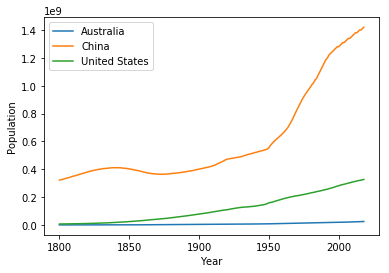

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_population = pd.read_csv('Population.csv',index_col='Year')
df_population[['Australia','China','United States']].plot()
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(loc="upper left")
plt.show()

part2

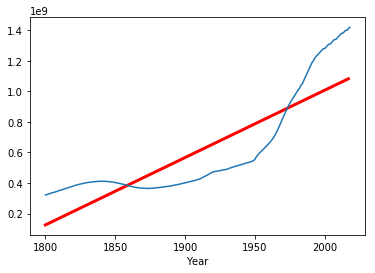

In [3]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_population.index,df_population.China)
line = [slope*xi + intercept for xi in range(1800,2018)]
plt.plot([x for x in range(1800,2018)],line,'r-',linewidth=3)
df_population['China'].plot()
plt.show()

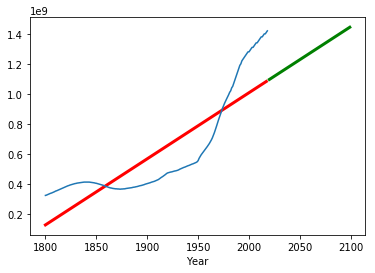

In [4]:
line_predict_china = [slope*xi + intercept for xi in range(2020,2100)]
plt.plot([x for x in range(1800,2018)],line,'r-',linewidth=3)
plt.plot([x for x in range(2020,2100)],line_predict_china,'g-',linewidth=3)
df_population['China'].plot()
plt.show()

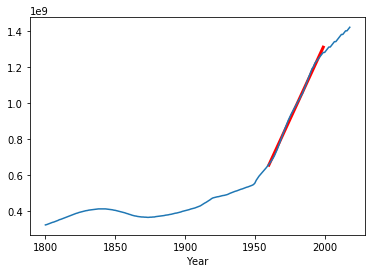

In [5]:
df1 = df_population.loc['1960':'1999',['China']]
slope1, intercept1, r_value1, p_value1, std_err1 = linregress([x for x in range(1960,2000)], df1.China)
line_fit_1960 = [slope1*xi + intercept1 for xi in range(1960,2000)]
plt.plot([x for x in range(1960,2000)],line_fit_1960,'r-',linewidth=3)
df_population['China'].plot()
plt.show()

A2

part1

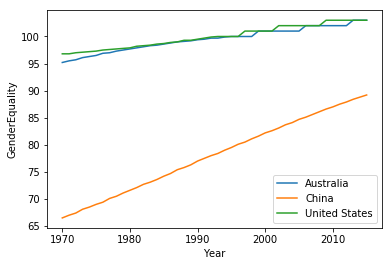

In [6]:
df_gender = pd.read_csv('GenderEquality.csv',index_col='Year')
df_gender[['Australia','China','United States']].plot()
plt.xlabel("Year")
plt.ylabel("GenderEquality")
plt.legend(loc="lower right")
plt.show()

In [7]:
print(df_gender["Australia"].describe())

count     46.000000
mean      99.506522
std        2.166862
min       95.200000
25%       97.950000
50%       99.700000
75%      101.000000
max      103.000000
Name: Australia, dtype: float64


part2

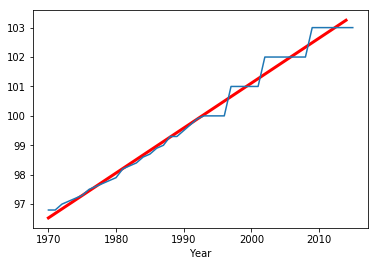

In [8]:
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df_gender.index,df_gender['United States'])
line = [slope2*xi + intercept2 for xi in range(1970,2015)]
plt.plot([x for x in range(1970,2015)],line,'r-',linewidth=3)
df_gender['United States'].plot()
plt.show()

A3

part1

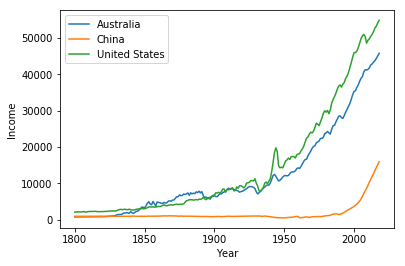

In [9]:
df_income = pd.read_csv('Income.csv',index_col='Year')
df_income[['Australia','China','United States']].plot()
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend(loc="upper left")
plt.show()

In [10]:
income_min_china = 50000
income_min_year = 1800
income_china = df_income['China'].tolist()
print('The minimum income in  China: ' + str(min(income_china)))
print('The year is: ' + str((income_china.index(min(income_china)) + 1800)))
rela_income = df_income.loc[(income_china.index(min(income_china)) + 1800),['Australia']]
print('The income of Australis in the same year: ' + str(rela_income))

The minimum income in  China: 530
The year is: 1949
The income of Australis in the same year: Australia    11800
Name: 1949, dtype: int64


A4

part1

In [11]:
temp_df1 = df_population
temp_column1 = []
for colunm in df_population.columns:
    temp_column1.append(colunm + '_Population')
temp_df1.columns = temp_column1

temp_df2 = df_gender
temp_column2 = []
for colunm in df_gender.columns:
    temp_column2.append(colunm + '_Gender')
temp_df2.columns = temp_column2

temp_df3 = df_income
temp_column3 = []
for colunm in df_income.columns:
    temp_column3.append(colunm + '_Income')
temp_df3.columns = temp_column3

df_list = []
df_list.append(temp_df1)
df_list.append(temp_df2)
df_list.append(temp_df3)
concat_df = pd.concat(df_list,axis=1)

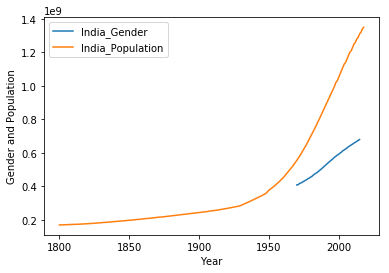

In [12]:
concat_df['India_Gender'] = concat_df['India_Gender']* 10000000
concat_df[['India_Gender','India_Population']].plot()
plt.xlabel("Year")
plt.ylabel("Gender and Population")
plt.legend(loc="upper left")
plt.show()

A5

In [23]:
from motionchart.motionchart import MotionChart

In [24]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [25]:
# df_population = pd.read_csv('Population.csv',index_col='Year')
# df_gender = pd.read_csv('GenderEquality.csv',index_col='Year')
# df_income = pd.read_csv('Income.csv',index_col='Year')
# country_list1 = df_population.columns.tolist()
# country_list2 = df_gender.columns.tolist()
# country_list3 = df_income.columns.tolist()
# intersection = list(set(country_list2).intersection(set(country_list3)))
# df_motion_list = []
# for country in intersection :
#     pd_country = pd.DataFrame({'Country': pd.Series([country]*len(df_population.index.tolist()))})
#     pd_year = pd.DataFrame({'Year': pd.Series(df_population.index.tolist())}) 
#     temp_df = pd.concat([pd_country, pd_year, concat_df[[country+'_Population', country+'_Gender', country+'_Income']]],axis=1)
#     df_motion_list.append(temp_df)
# df_motion = pd.concat(df_motion_list)
# print(df_motion)

df_population = pd.read_csv('Population.csv')
df_gender = pd.read_csv('GenderEquality.csv')
df_income = pd.read_csv('Income.csv')

country_list1 = df_population.columns.tolist()
country_list1.remove('Year')
country_list2 = df_gender.columns.tolist()
country_list2.remove('Year')
country_list3 = df_income.columns.tolist()
country_list3.remove('Year')

population_list = []
for country in country_list1:
    country_series = pd.Series([country]*len(df_population['Year']))
    year_series = pd.Series(df_population['Year'])
    population_series = pd.Series(df_population[country])
    temp_df = pd.DataFrame({'Year':year_series, 'Country':country_series, 'Population': population_series})
    population_list.append(temp_df)
merge_population = pd.concat(population_list)

gender_list = []
for country in country_list2:
    country_series = pd.Series([country]*len(df_gender['Year']))
    year_series = pd.Series(df_gender['Year'])
    gender_series = pd.Series(df_gender[country])
    temp_df = pd.DataFrame({'Year':year_series, 'Country':country_series, 'Gender': gender_series})
    gender_list.append(temp_df)
merge_gender = pd.concat(gender_list)

income_list = []
for country in country_list3:
    country_series = pd.Series([country]*len(df_income['Year']))
    year_series = pd.Series(df_income['Year'])
    income_series = pd.Series(df_income[country])
    temp_df = pd.DataFrame({'Year':year_series, 'Country':country_series, 'Income': income_series})
    income_list.append(temp_df)
merge_income = pd.concat(income_list)

merge1 = pd.merge(merge_population, merge_gender, on=['Year','Country'])
merge2 = pd.merge(merge1, merge_income, on=['Year','Country'])

In [26]:
mChart = MotionChart(df = merge2)
mChart.to_notebook()

In [37]:
merge3 = merge2[(merge2.Country == 'Bolivia') | (merge2.Country == 'Cape Verde')]
mChart2 = MotionChart(df = merge3)
mChart2.to_notebook()      

B1

In [4]:
df_insurance = pd.read_csv('InsuranceRates.csv')

In [5]:
print('rows: ' + str(df_insurance.shape[0]))
print('columns: ' + str(df_insurance.shape[1]))

rows: 12694445
columns: 7


In [6]:
business_year = df_insurance.drop_duplicates(['BusinessYear'])
print(business_year['BusinessYear'].values)
print(len(business_year['BusinessYear'].values))

[2014 2015 2016]
3


In [7]:
age = df_insurance.drop_duplicates(['Age'])
print(age['Age'].values)

['0-20' 'Family Option' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65 and over']


In [8]:
state = df_insurance.drop_duplicates(['StateCode'])
print(state['StateCode'].values)
print(len(state['StateCode'].values))

['AK' 'AL' 'AZ' 'FL' 'GA' 'IN' 'LA' 'MO' 'MS' 'NC' 'ND' 'NJ' 'OK' 'PA'
 'SC' 'TN' 'TX' 'WI' 'WY' 'AR' 'DE' 'IL' 'KS' 'ME' 'MI' 'MT' 'NH' 'NM'
 'VA' 'WV' 'IA' 'ID' 'NE' 'OH' 'SD' 'UT' 'NV' 'OR' 'HI']
39


In [9]:
issuer = df_insurance.drop_duplicates(['IssuerId'])
print(len(issuer['IssuerId'].values))

910


In [10]:
print(df_insurance[['IndividualRate', 'IndividualTobaccoRate']].max())
print(df_insurance[['IndividualRate', 'IndividualTobaccoRate']].min())
print(df_insurance[['IndividualRate', 'IndividualTobaccoRate']].mean())

IndividualRate           999999.00
IndividualTobaccoRate      6604.61
dtype: float64
IndividualRate            0.00
IndividualTobaccoRate    41.73
dtype: float64
IndividualRate           4098.026459
IndividualTobaccoRate     543.691079
dtype: float64


B2

Text(0,0.5,'Occurrence')

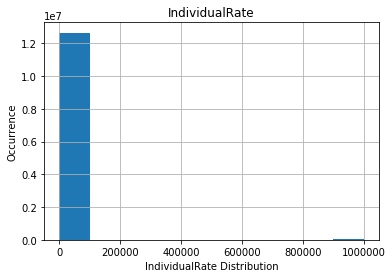

In [11]:
df_insurance[['IndividualRate']].hist()
plt.xlabel("IndividualRate Distribution")
plt.ylabel("Occurrence")

In [12]:
df_insurance = df_insurance[(df_insurance.IndividualRate > 0) & (df_insurance.IndividualRate < 2000)]

Text(0,0.5,'Occurrence')

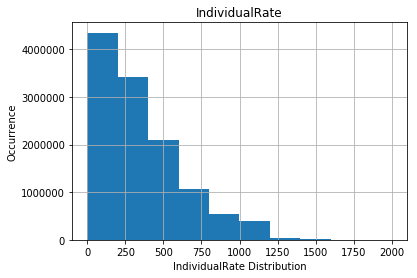

In [13]:
# import numpy as np
# df_individualrate = df_insurance[['IndividualRate']]
# distribution = ['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-1400','1400-1600','1600-1800','1800-2000']
# distribution_df = pd.DataFrame(np.zeros([10, 1], dtype=int), index=distribution, columns=["Occurrence"])
# for i in range(10):
#     distribution_df.iloc[i,0] = df_individualrate[(df_individualrate.IndividualRate > (i*200)) & (df_individualrate.IndividualRate < ((i+1)*200))].shape[0]
# distribution_df.plot(kind='bar')
# plt.xlabel("IndividualRate Distribution")
# plt.ylabel("Occurrence")
# plt.show()
df_insurance[['IndividualRate']].hist()
plt.xlabel("IndividualRate Distribution")
plt.ylabel("Occurrence")

B3

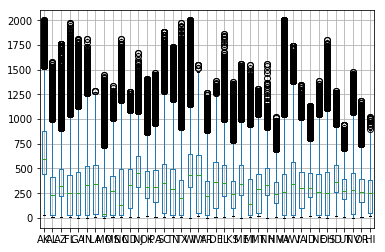

In [18]:
state = df_insurance.drop_duplicates(['StateCode'])
state_list = state['StateCode'].values
temp_insurance_list = []
for state in state_list:
    temp_df = df_insurance[(df_insurance.StateCode == state)]
    temp_df2 = temp_df[['IndividualRate']]
    temp_df2.columns = [state]
    temp_insurance_list.append(temp_df2)
state_insurance_df = pd.concat(temp_insurance_list,axis=1)
state_insurance_df.boxplot()
plt.show()

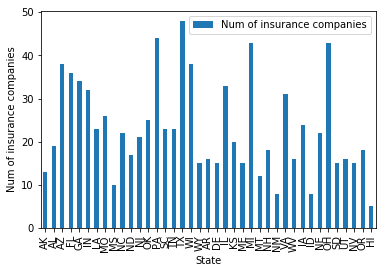

In [20]:
import numpy as np

distribution_df = pd.DataFrame(np.zeros([39, 1], dtype=int), index=state_list, columns=['Num of insurance companies'])
for state in state_list:
    distribution_df.loc[state,['Num of insurance companies']] = len(df_insurance[(df_insurance.StateCode == state)].drop_duplicates(['IssuerId']).values)
distribution_df.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Num of insurance companies')
plt.show()

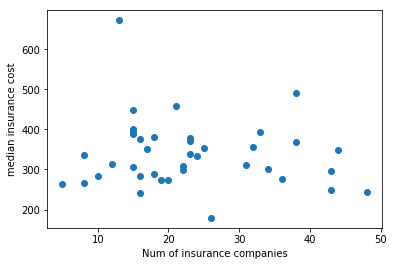

In [33]:
plt.scatter(distribution_df['Num of insurance companies'].tolist(), state_insurance_df.mean().tolist())
plt.xlabel('Num of insurance companies')
plt.ylabel('median insurance cost')
plt.show()

B4

In [34]:
mChart3 = MotionChart(df = df_insurance[['BusinessYear', 'Age', 'IndividualRate']])
mChart3.to_notebook()